In [1]:
import pandas as pd

pd.__version__

'2.3.3'

In [3]:
df = pd.read_parquet(
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet"
)

In [3]:
import sklearn
sklearn.__version__

'1.7.2'

In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.00,3.00,0.5,0.00,0.00,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.00,0.50,0.5,8.65,0.00,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.00,0.50,0.5,6.05,0.00,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.50,0.50,0.5,4.06,0.00,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369764,2,2021-01-31 23:03:00,2021-01-31 23:33:00,NaN,8.89,NaN,None,229,181,0,27.78,0.00,0.5,7.46,0.00,0.3,38.54,NaN,NaN
1369765,2,2021-01-31 23:29:00,2021-01-31 23:51:00,NaN,7.43,NaN,None,41,70,0,32.58,0.00,0.5,0.00,6.12,0.3,39.50,NaN,NaN
1369766,2,2021-01-31 23:25:00,2021-01-31 23:38:00,NaN,6.26,NaN,None,74,137,0,16.85,0.00,0.5,3.90,0.00,0.3,24.05,NaN,NaN
1369767,6,2021-01-31 23:01:06,2021-02-01 00:02:03,NaN,19.70,NaN,None,265,188,0,53.68,0.00,0.5,0.00,0.00,0.3,54.48,NaN,NaN


In [5]:
df.isna().sum()


VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            98352
trip_distance                  0
RatecodeID                 98352
store_and_fwd_flag         98352
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       98352
airport_fee              1369764
dtype: int64

In [12]:
col_to_del = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'congestion_surcharge', 'airport_fee', 'PULocationID', 'DOLocationID']

In [7]:
df['duration'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60

dt = df['tpep_pickup_datetime']
df['hour'] = dt.dt.hour
df['dayofweek'] = dt.dt.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

df['PU_DO'] = (
    df['PULocationID'].astype(str)
    + '_'
    + df['DOLocationID'].astype(str)
)

In [8]:
results = []

for col in df.columns:
    if col == 'passenger_count':
        continue
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    
    null_both = df[['passenger_count', col]].isna().all(axis=1).sum()
    
    df_clean = df[
        df['passenger_count'].notna() &
        df[col].notna()
    ]
    
    corr = df_clean['passenger_count'].corr(df[col])
    
    results.append({
        'column': col,
        'null_both': null_both,
        'correlation': corr
    })

result_df = pd.DataFrame(results).sort_values(
    by='correlation', key=abs, ascending=False
)

print(result_df)


/home/lpk/miniconda3/envs/shadowing/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/lpk/miniconda3/envs/shadowing/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                   column  null_both  correlation
0                VendorID          0     0.193256
7                   extra          0    -0.162697
18             is_weekend          0     0.024862
16                   hour          0     0.022828
17              dayofweek          0     0.021820
15               duration          0     0.009337
12           total_amount          0     0.006628
13   congestion_surcharge      98352     0.006557
8                 mta_tax          0     0.006210
2              RatecodeID      98352    -0.005506
6             fare_amount          0     0.005423
9              tip_amount          0     0.005292
11  improvement_surcharge          0     0.004232
10           tolls_amount          0     0.003052
5            payment_type          0    -0.002381
3            PULocationID          0    -0.000600
4            DOLocationID          0     0.000416
1           trip_distance          0     0.000138
14            airport_fee      98352          NaN


In [15]:
df.groupby('passenger_count')['total_amount'].agg(
    mean_total_amount='mean',
    trip_count='count'
)

,mean_total_amount,trip_count
passenger_count,,
0.0,25.327817,31465
1.0,26.205230,2188739
2.0,29.520660,405103
3.0,29.138309,91262
4.0,30.877267,51974
5.0,26.269129,33506
6.0,25.801183,22353
7.0,57.735000,8
8.0,95.668039,51


In [9]:
# After checking correlation -> not need to predict passenger_count from other data, just using mode (the value(s) that appear most often.)
mode_passenger_count_df = df.copy()
mode_passenger_count_df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mode()[0])

In [10]:
mode_passenger_count_df['passenger_count'].isna().sum()

np.int64(0)

In [37]:
# NaN passenger_count -> Use other correlation like total_amount, airport_fee

# Feature to use: passenger_count, RatecodeID, PULocationID, DOLocationID, total amount

cleaned_df = mode_passenger_count_df.drop(columns=col_to_del)

In [38]:
# Check for anomaly and filter out if needed
cleaned_df['duration'].describe()

count    1.369769e+06
mean     1.391168e+01
std      1.312006e+02
min     -1.350846e+05
25%      5.566667e+00
50%      9.066667e+00
75%      1.461667e+01
max      2.881770e+04
Name: duration, dtype: float64

In [39]:
cleaned_df['duration'].quantile([0.5, 0.9, 0.95, 0.98, 0.99])

0.50     9.066667
0.90    22.866667
0.95    30.366667
0.98    41.116667
0.99    51.416667
Name: duration, dtype: float64

In [40]:
cleaned_df = cleaned_df[
    cleaned_df["duration"].between(
        0.0001,  # Use a small positive value instead of 0 to be safe
        cleaned_df["duration"].quantile(0.99),
        inclusive="neither",  # > 0 and < quantile
    )
]

In [41]:
cleaned_df

,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,hour,dayofweek,is_weekend,PU_DO
0,1,1.0,2.10,8.00,3.00,0.5,0.00,0.00,0.3,11.80,6.033333,0,4,0,142_43
1,1,1.0,0.20,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.983333,0,4,0,238_151
2,1,1.0,14.70,42.00,0.50,0.5,8.65,0.00,0.3,51.95,27.600000,0,4,0,132_165
3,1,0.0,10.60,29.00,0.50,0.5,6.05,0.00,0.3,36.35,15.216667,0,4,0,138_132
4,2,1.0,4.94,16.50,0.50,0.5,4.06,0.00,0.3,24.36,16.533333,0,4,0,68_33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369763,2,1.0,7.74,22.15,0.00,0.5,0.00,0.00,0.3,22.95,14.000000,23,6,1,159_259
1369764,2,1.0,8.89,27.78,0.00,0.5,7.46,0.00,0.3,38.54,30.000000,23,6,1,229_181
1369765,2,1.0,7.43,32.58,0.00,0.5,0.00,6.12,0.3,39.50,22.000000,23,6,1,41_70
1369766,2,1.0,6.26,16.85,0.00,0.5,3.90,0.00,0.3,24.05,13.000000,23,6,1,74_137


In [35]:
from sklearn.model_selection import train_test_split


target_col = 'duration'

X = cleaned_df.drop(columns=[target_col])
y = cleaned_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

Target variable statistics:
Mean: 10.17
Std: 6.25
Min: 0.02
Max: 30.45
95th percentile: 23.12


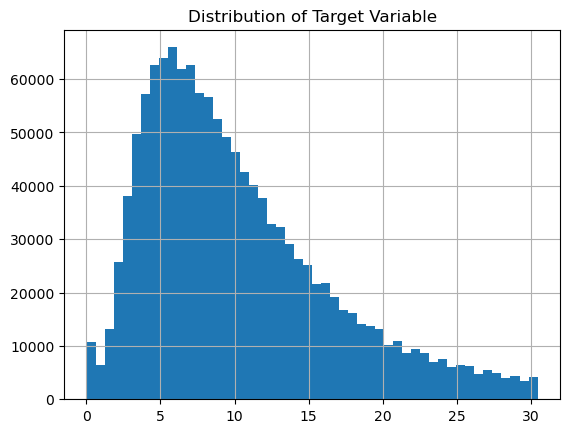

In [42]:
import matplotlib.pyplot as plt 

print(f"Target variable statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")
print(f"95th percentile: {y.quantile(0.95):.2f}")

# Check distribution
y.hist(bins=50)
plt.title('Distribution of Target Variable')
plt.show()

In [43]:
from catboost import CatBoostRegressor

cat_cols = [
    'VendorID',
    'hour',
    'dayofweek',
    'is_weekend',
    'PU_DO',
]

cat_feature_indices = [X.columns.get_loc(col) for col in cat_cols]

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

model.fit(
    X_train, y_train,
    cat_features=cat_feature_indices,
    eval_set=(X_test, y_test),
    use_best_model=True
)

0:	learn: 6.0006476	test: 5.9820998	best: 5.9820998 (0)	total: 384ms	remaining: 3m 11s
100:	learn: 1.7364240	test: 1.7335727	best: 1.7335727 (100)	total: 33.6s	remaining: 2m 12s
200:	learn: 1.5273121	test: 1.5224129	best: 1.5224129 (200)	total: 1m 4s	remaining: 1m 36s
300:	learn: 1.4337076	test: 1.4304410	best: 1.4304410 (300)	total: 1m 36s	remaining: 1m 3s
400:	learn: 1.3857456	test: 1.3846468	best: 1.3846468 (400)	total: 2m 7s	remaining: 31.5s
499:	learn: 1.3569956	test: 1.3576524	best: 1.3576524 (499)	total: 2m 36s	remaining: 0us

bestTest = 1.357652371
bestIteration = 499



In [45]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 1.84321996213445
MAE: 0.7764496478558114
R²: 0.9526513330427797


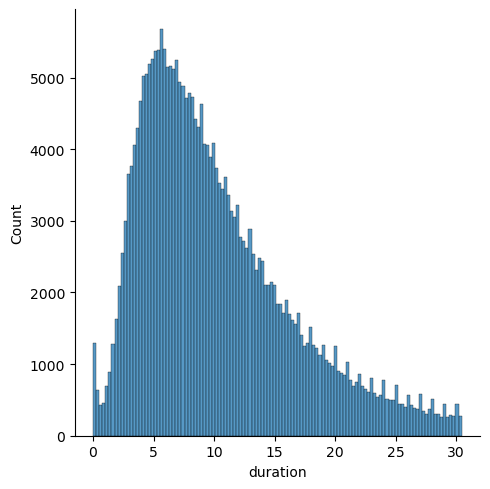

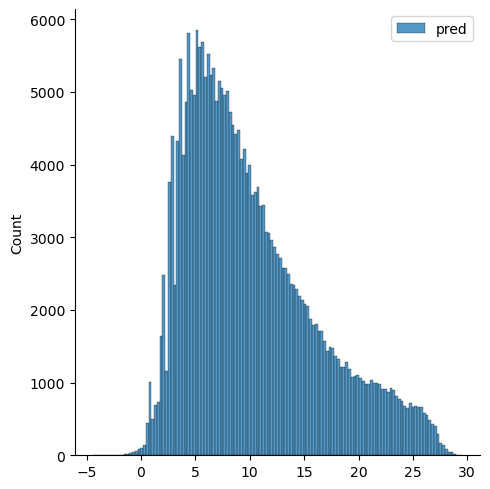

In [46]:
import seaborn as sns

sns.displot(y_test, label='actual')
sns.displot(y_pred, label='pred')

plt.legend()